In [3]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path

In [4]:
import torch
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU")

True
1
NVIDIA RTX 500 Ada Generation Laptop GPU


In [5]:
x  = r'improved_images'
path = Path(x)
path.ls()

[Path('improved_images/suprise'), Path('improved_images/sad'), Path('improved_images/.DS_Store'), Path('improved_images/neutral'), Path('improved_images/happy')]

In [6]:
from fastai.vision.all import *

np.random.seed(40)

data = ImageDataLoaders.from_folder(
    path,
    valid_pct=0.2,
    seed=40,
    bs=32,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1.0)
)


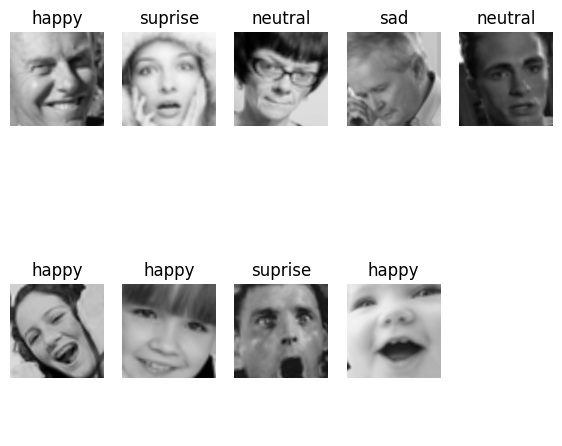

In [7]:
data.show_batch(nrows=2, figsize=(7,6))

In [8]:
print(data.vocab)


['happy', 'neutral', 'sad', 'suprise']


In [9]:
learn = vision_learner(
    data,
    resnet18,
    metrics=[accuracy],
    model_dir=Path("emotion_cnn_model")
)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/devi-amarsaikhan/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:05<00:00, 7.90MB/s]


<div></div>

Suggested LR: 0.001737800776027143


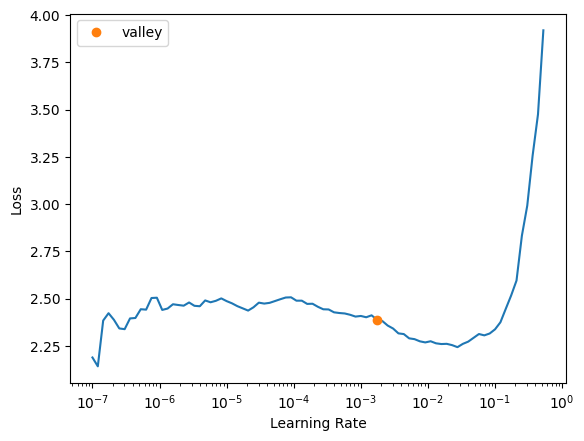

In [10]:
lr_finder = learn.lr_find()   # runs LR finder

print("Suggested LR:", lr_finder.valley)


In [13]:
from fastai.callback.progress import ConsoleProgressCallback

# Remove any existing progress callbacks (safe even if not present)
learn.cbs = [cb for cb in learn.cbs if cb.__class__.__name__ not in ["ProgressCallback"]]

# Add console progress
learn.add_cb(ConsoleProgressCallback())


ImportError: cannot import name 'ConsoleProgressCallback' from 'fastai.callback.progress' (/home/devi-amarsaikhan/MLSN-Team-6/venv/lib/python3.12/site-packages/fastai/callback/progress.py)

In [12]:
lr1 = 1e-3
lr2 = 1e-1
from fastai.callback.progress import CSVLogger

learn.remove_cbs(learn.cbs.filter(lambda x: x.__class__.__name__ in ['ProgressCallback']))
learn.fit_one_cycle(60, slice(1e-3, 1e-1), cbs=[CSVLogger()])

AttributeError: Exception occured in `Recorder` when calling event `after_epoch`:
	'NBMasterBar' object has no attribute 'out'

In [15]:
learn.unfreeze()
learn.fit_one_cycle(40,slice(1e-4,1e-3))

AttributeError: Exception occured in `Recorder` when calling event `after_epoch`:
	'NBMasterBar' object has no attribute 'out'

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

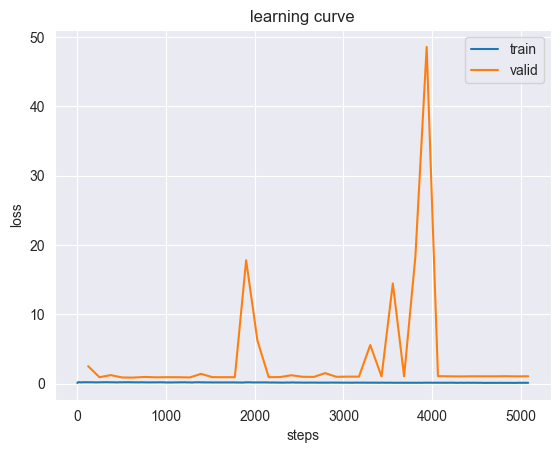

In [33]:
learn.recorder.plot_loss()

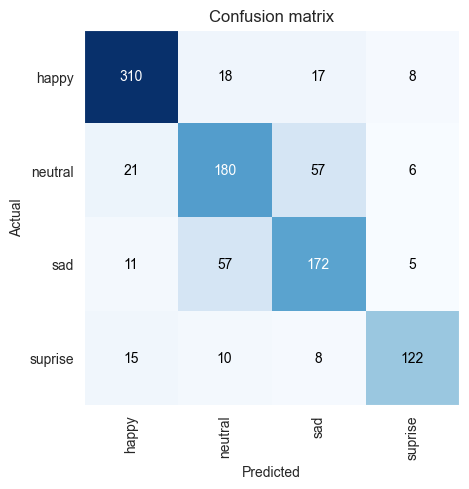

In [34]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

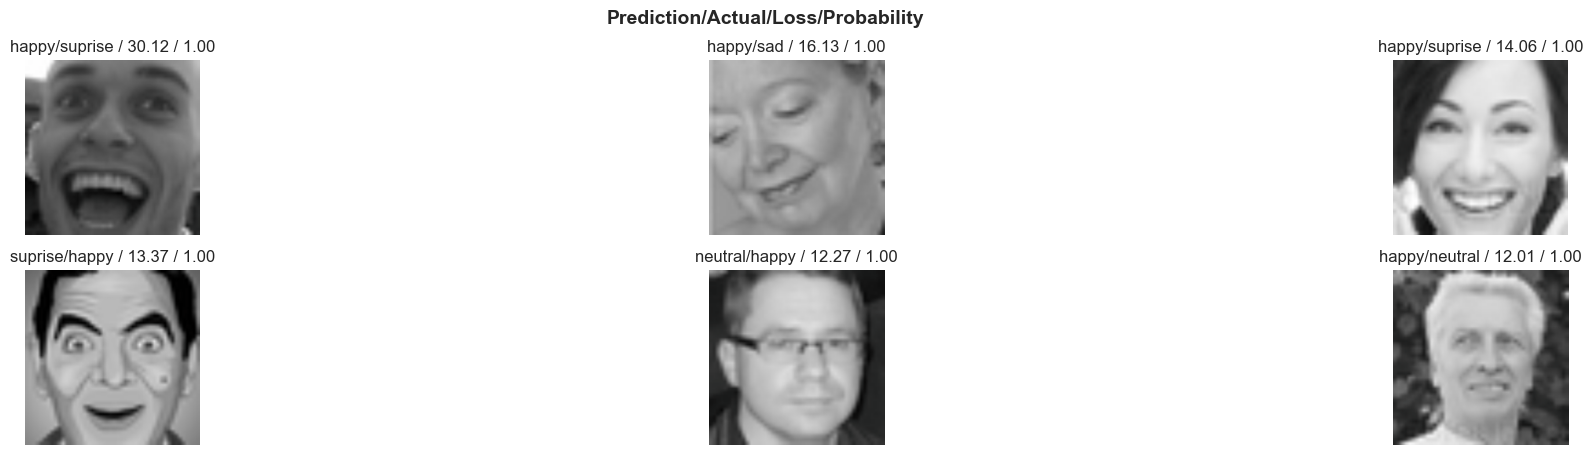

In [35]:
interp.plot_top_losses(6,figsize = (25,5))

In [36]:
learn.export(Path(r"C:\Users\sbval\PycharmProjects\MLSN-Team-6\emotion_classifier.pkl"))